# Forecasting with Prophet
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
[Source](https://github.com/yishairasowsky/prophet).

## Import Libraries
We will need three libraries:
1. warnings -- to be blocked
2. pandas -- for linear algebra
3. fbprphet -- facebook's forecaster

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from fbprophet import Prophet

INFO:matplotlib.font_manager:font search path ['/opt/ds3/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf', '/opt/ds3/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/afm', '/opt/ds3/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
INFO:matplotlib.font_manager:generated new fontManager


## Load Data
Our data is a time series of the log daily page views for the Wikipedia page for Peyton Manning. [Source](https://github.com/yishairasowsky/prophet/blob/master/examples/example_wp_log_peyton_manning.csv).

In [4]:
data={}
data['min-temp']='daily-min-temperatures.csv'
data['temp']='example_yosemite_temps.csv'
data['manning']='example_wp_log_peyton_manning.csv'
path=data['min-temp']
df = pd.read_csv(path)
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## Name Columns
Prophet requires that the columns have certain names.
- Date column must be called ds, and 
- Feature column must be called y.

In [5]:
df=df.rename(columns={"Date": "ds", "Temp": "y"})
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## Fit the Model
Instantiate a new Prophet object, and pass any settings for the forecasting procedure into the constructor. 

In [6]:
m = Prophet()

Call the fit method and pass in the historical dataframe. The fitting process may take a few seconds.

In [7]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Dates to be Predicted
- You will need a column ds containing the future dates you want to predict. 
- Use the helper method Prophet.make_future_dataframe to make a suitable dataframe which extends into the future a specified number of days . 
- The resulting dataframe will include the dates from the history. Thus you will also see the model fit.

In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


## Make Predictions
1. Create a new dataframe object called forecast.
1. The column 'yhat' will contain the predicted value for each future date.
1. You will automatically receive uncertainty intervals as well.
1. If you passed in historical dates, you will have an in-sample fit. 

In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4010,1991-12-27,14.491036,10.971365,17.970257
4011,1991-12-28,14.509474,10.989130,18.067727
4012,1991-12-29,14.480719,11.193341,18.147417
4013,1991-12-30,14.683027,11.090785,17.948686
4014,1991-12-31,14.853970,11.528453,18.364416


## Plot 
1. Call the Prophet.plot method
1. Pass in your forecast dataframe.

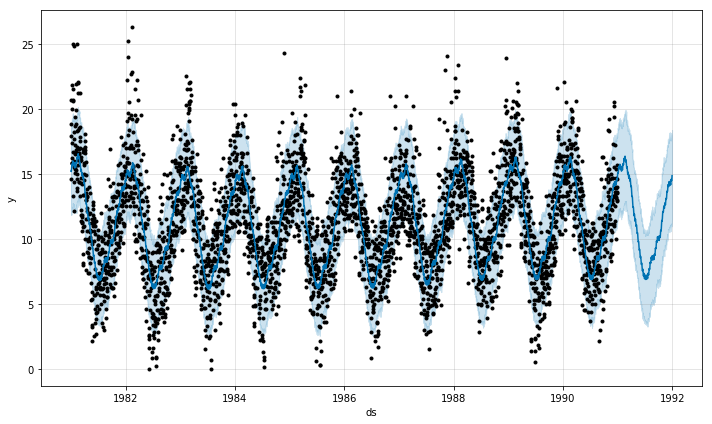

In [10]:
fig1 = m.plot(forecast)

## View Components
1. Use the Prophet.plot_components method. 
1. Default is to show the trend, yearly seasonality, and weekly seasonality of the time series. 
3. You can include holidays if you want to see them too.



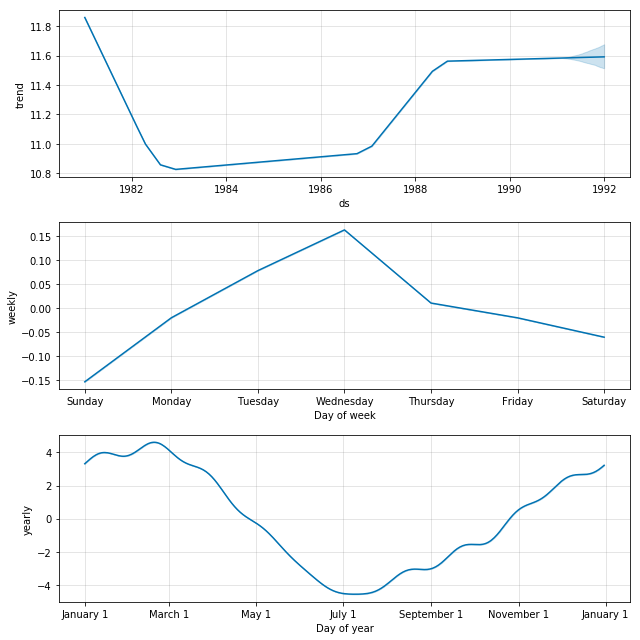

In [11]:
fig2 = m.plot_components(forecast)

## Interactive Plot
If your version of fbprophet is 0.5 or higher, you can install and use plotly to make an interactive plot.

### Check Version

In [14]:
import fbprophet
v=float(fbprophet.__version__)
#v=.4
if v>=.5:
    report=['That should suffice to use plotly.',1]
elif v<.5:
    report=["Please upgrade to version 0.5 or higher, by visiting https://facebook.github.io/prophet/docs/installation.html.",0]
print("Apparently, you are using version {}.\n{}".format(v,report[0]))
if report[1]:
    from fbprophet.plot import plot_plotly
    print('Please wait...\nInstallation successful!')

Apparently, you are using version 0.5.
That should suffice to use plotly.
Please wait...
Installation successful!


In [ ]:
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)